In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
from PIL import Image
import glob
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = '/content/drive/MyDrive/tomato-5k for train/train'
val_dir = '/content/drive/MyDrive/tomato-5k for train/val'

In [ ]:
def clean_dataset(directory):
    """
    Removes corrupted images from the dataset directory.
    """
    num_removed = 0
    for img_file in glob.glob(directory + '/**/*.jpg', recursive=True):
        try:
            img = Image.open(img_file)
            img.verify()  # Check if the file is corrupted
        except (IOError, SyntaxError):
            print(f'Removing corrupted image: {img_file}')
            os.remove(img_file)
            num_removed += 1
    print(f"Total corrupted images removed: {num_removed}")

In [ ]:
print("Cleaning training dataset...")
clean_dataset(train_dir)

# Clean validation dataset
print("Cleaning validation dataset...")
clean_dataset(val_dir)

Cleaning training dataset...
Total corrupted images removed: 0
Cleaning validation dataset...
Total corrupted images removed: 0


In [ ]:
np.random.seed(1337)
classifier = Sequential()
classifier.add(Convolution2D(32, (3, 3), input_shape=(128, 128, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
classifier.add(Convolution2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
classifier.add(Convolution2D(128, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
classifier.add(Flatten())
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units=5, activation='softmax'))  # Adjust class count if needed

# Compile the CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
print(classifier.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 29, 29, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,686,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,780,421 (14.42 MB)

 Trainable params: 3,780,421 (14.42 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=64,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=64,
    class_mode='categorical'
)

Found 5007 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the batch size
batch_size = 64

# Create the training and validation data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load the training and validation datasets
training_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='categorical'
)

# Train the model using the generators
classifier.fit(
    training_set,  # Using the generator directly
    steps_per_epoch=training_set.samples // batch_size,
    epochs=25,
    validation_data=test_set,  # Using the validation generator directly
    validation_steps=test_set.samples // batch_size
)

Found 5007 images belonging to 5 classes.
Found 500 images belonging to 5 classes.
Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


78/78 ━━━━━━━━━━━━━━━━━━━━ 904s 11s/step - accuracy: 0.3143 - loss: 1.5293 - val_accuracy: 0.5491 - val_loss: 1.1558
Epoch 2/25
 1/78 ━━━━━━━━━━━━━━━━━━━━ 2:38 2s/step - accuracy: 0.7656 - loss: 0.7239

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


78/78 ━━━━━━━━━━━━━━━━━━━━ 13s 143ms/step - accuracy: 0.7656 - loss: 0.7239 - val_accuracy: 0.7308 - val_loss: 0.8302
Epoch 3/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 251s 3s/step - accuracy: 0.7337 - loss: 0.7273 - val_accuracy: 0.6272 - val_loss: 1.0950
Epoch 4/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7344 - loss: 0.6260 - val_accuracy: 0.6731 - val_loss: 0.9679
Epoch 5/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 250s 3s/step - accuracy: 0.8173 - loss: 0.5030 - val_accuracy: 0.8058 - val_loss: 0.4769
Epoch 6/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 13s 138ms/step - accuracy: 0.8906 - loss: 0.2974 - val_accuracy: 0.5962 - val_loss: 0.9861
Epoch 7/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 231s 3s/step - accuracy: 0.8545 - loss: 0.4144 - val_accuracy: 0.7076 - val_loss: 0.8271
Epoch 8/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9062 - loss: 0.2967 - val_accuracy: 0.7885 - val_loss: 0.5131
Epoch 9/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 236s 3s/step - accuracy: 0.8524 - loss: 0.4024 - val_accuracy: 0.8371 - val_loss: 

In [ ]:
classifier.save_weights('keras_tomato_trained_model_weights_cleaned.weights.h5')
print('Model weights saved as keras_tomato_trained_model_weights_cleaned.weights.h5')

Model weights saved as keras_tomato_trained_model_weights_cleaned.weights.h5


In [ ]:
label_map = training_set.class_indices
print(label_map)

{'Tomato___Bacterial_spot': 0, 'Tomato___Early_blight': 1, 'Tomato___Late_blight': 2, 'Tomato___Leaf_Mold': 3, 'Tomato___healthy': 4}


In [ ]:
loss, accuracy = classifier.evaluate(test_set, steps=test_set.samples // batch_size)

# Output the accuracy
print(f'Validation Loss: {loss:.4f}')
print(f'Validation Accuracy: {accuracy:.4f}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8682 - loss: 0.3647
Validation Loss: 0.4478
Validation Accuracy: 0.8549


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Class Index: 3
Predicted Class Name: Tomato___Leaf_Mold
Confidence Score: 0.9996


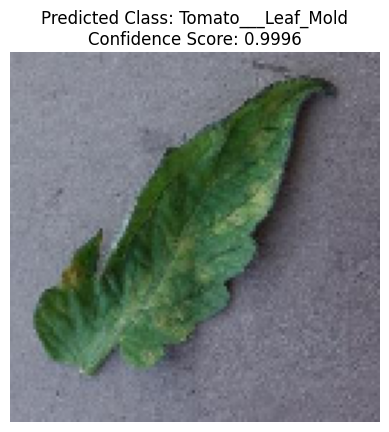

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load the saved weights into the existing model
classifier.load_weights('/content/keras_tomato_trained_model_weights_cleaned.weights.h5')

# Load and preprocess the image
img_path = '/content/05bbff69-adad-4e16-8fad-c265be82e25a___Crnl_L.Mold 6929.JPG'
img = image.load_img(img_path, target_size=(128, 128))  # Resize to match model input
img_array = image.img_to_array(img)  # Convert to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize pixel values

# Predict using the loaded model
prediction = classifier.predict(img_array)

# Predict the class of the image
predicted_class_index = np.argmax(prediction[0])  # Index of the highest probability
confidence_score = np.max(prediction[0])  # Get the highest confidence score

# Class names mapping
class_names = {
    'Tomato___Bacterial_spot': 0,
    'Tomato___Early_blight': 1,
    'Tomato___Late_blight': 2,
    'Tomato___Leaf_Mold': 3,
    'Tomato___healthy': 4
}

# Reverse the mapping to get class name from index
class_names_reversed = {v: k for k, v in class_names.items()}

# Get the predicted class name
predicted_class_name = class_names_reversed[predicted_class_index]

# Print the results
print(f'Predicted Class Index: {predicted_class_index}')
print(f'Predicted Class Name: {predicted_class_name}')
print(f'Confidence Score: {confidence_score:.4f}')

# Display the image along with prediction
plt.imshow(img)  # Display the original image
plt.axis('off')  # Hide axes
plt.title(f'Predicted Class: {predicted_class_name}\nConfidence Score: {confidence_score:.4f}')  # Add title with prediction info
plt.show()  # Show the image